<a href="https://colab.research.google.com/github/sprabhala-cpu/Machine-Learning/blob/main/time_series_anomaly_detection_on_apple_stock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
url='https://raw.githubusercontent.com/sprabhala-cpu/Machine-Learning/main/AAPL.csv'
data=pd.read_csv(url)


In [2]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-04-24,69.300003,70.752502,69.250000,70.742500,70.198349,126508800
1,2020-04-27,70.449997,71.135002,69.987503,70.792503,70.247971,117087600
2,2020-04-28,71.269997,71.457497,69.550003,69.644997,69.109299,112004800
3,2020-04-29,71.182503,72.417503,70.972504,71.932503,71.379196,137280800
4,2020-04-30,72.489998,73.632500,72.087502,73.449997,72.885025,183064000
...,...,...,...,...,...,...,...
247,2021-04-19,133.509995,135.470001,133.339996,134.839996,134.839996,93996100
248,2021-04-20,135.020004,135.529999,131.809998,133.110001,133.110001,94660400
249,2021-04-21,132.360001,133.750000,131.300003,133.500000,133.500000,68847100
250,2021-04-22,133.039993,134.149994,131.410004,131.940002,131.940002,84566500


auto encoders are unsupervised learnign techniques although they are trained using supervised learning models.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


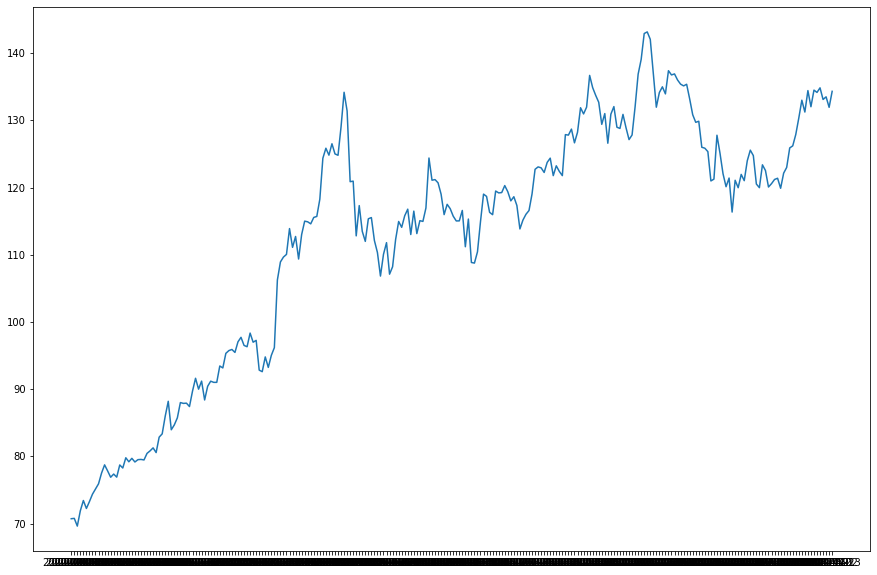

In [4]:
plt.figure(figsize=(15,10))
plt.plot(data['Date'],data['Close'])
plt.show()

In [5]:
import plotly.graph_objects as go
fig=go.Figure()
fig.add_trace(go.Scatter(x=data['Date'], y=data['Close'], name='Close price'))
fig.update_layout(showlegend=True,title='apple stock price from 2020-2021')
fig.show()



In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       252 non-null    object 
 1   Open       252 non-null    float64
 2   High       252 non-null    float64
 3   Low        252 non-null    float64
 4   Close      252 non-null    float64
 5   Adj Close  252 non-null    float64
 6   Volume     252 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


In [7]:
np.random.seed(1)
import tensorflow as tf
tf.random.set_seed(1)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, RepeatVector, TimeDistributed
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-04-24,69.300003,70.752502,69.250000,70.742500,70.198349,126508800
1,2020-04-27,70.449997,71.135002,69.987503,70.792503,70.247971,117087600
2,2020-04-28,71.269997,71.457497,69.550003,69.644997,69.109299,112004800
3,2020-04-29,71.182503,72.417503,70.972504,71.932503,71.379196,137280800
4,2020-04-30,72.489998,73.632500,72.087502,73.449997,72.885025,183064000


In [8]:
data=data[['Date','Close']]

In [9]:
data

,Date,Close
0,2020-04-24,70.742500
1,2020-04-27,70.792503
2,2020-04-28,69.644997
3,2020-04-29,71.932503
4,2020-04-30,73.449997
...,...,...
247,2021-04-19,134.839996
248,2021-04-20,133.110001
249,2021-04-21,133.500000
250,2021-04-22,131.940002


In [10]:
data['Date']=pd.to_datetime(data['Date'])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    252 non-null    datetime64[ns]
 1   Close   252 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 4.1 KB


In [12]:
data['Date'].min()
data['Date'].max()

Timestamp('2021-04-23 00:00:00')

In [16]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=data['Date'], y=data['Close'], name='Close price'))

fig.show()

In [29]:
train,test=data.loc[data['Date']<='2021-01-30'],data.loc[data['Date']>'2021-01-30']

In [30]:
train['Date'].max()

Timestamp('2021-01-29 00:00:00')

In [31]:
train.head()

,Date,Close
0,2020-04-24,70.742500
1,2020-04-27,70.792503
2,2020-04-28,69.644997
3,2020-04-29,71.932503
4,2020-04-30,73.449997


In [32]:
train.shape

(194, 2)

In [33]:
test.shape

(58, 2)

In [34]:
#standarise the data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler=scaler.fit(train[['Close']])
train['Close']=scaler.transform(train[['Close']])
test['Close']=scaler.transform(test[['Close']])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [36]:
train['Close'].max()

1.847440848329821

In [ ]:
#the input for lstm is 3d combingin time steps will make
#[samples,imesteps,features]


In [52]:
Time_steps=30
def create_sequence(X,y,time_steps=Time_steps):
  Xs,ys=[],[]
  for i in range(len(X)-time_steps):
    Xs.append(X.iloc[i:(i+time_steps)].values)
    ys.append(y.iloc[i+time_steps])
  return np.array(Xs),np.array(ys)


In [53]:
X_train, y_train = create_sequence(train[['Close']], train['Close'])
X_test, y_test = create_sequence(test[['Close']], test['Close'])

In [58]:
X_train[0]

array([[-1.99454875],
       [-1.99189592],
       [-2.05277493],
       [-1.93141513],
       [-1.85090702],
       [-1.91364232],
       [-1.85939534],
       [-1.80103679],
       [-1.76031825],
       [-1.71906945],
       [-1.6343166 ],
       [-1.56959148],
       [-1.61733953],
       [-1.66720982],
       [-1.64214191],
       [-1.66641402],
       [-1.57025486],
       [-1.59439381],
       [-1.51362017],
       [-1.54518695],
       [-1.51812965],
       [-1.5467785 ],
       [-1.52847547],
       [-1.52661839],
       [-1.53072997],
       [-1.47887029],
       [-1.45910809],
       [-1.43549936],
       [-1.47263653],
       [-1.35087924]])

In [ ]:
#build the model

In [55]:
X_test.shape

(28, 30, 1)

In [59]:
y_train[0]

-1.324883220209407

In [64]:
X_train[0]

array([[-1.99454875],
       [-1.99189592],
       [-2.05277493],
       [-1.93141513],
       [-1.85090702],
       [-1.91364232],
       [-1.85939534],
       [-1.80103679],
       [-1.76031825],
       [-1.71906945],
       [-1.6343166 ],
       [-1.56959148],
       [-1.61733953],
       [-1.66720982],
       [-1.64214191],
       [-1.66641402],
       [-1.57025486],
       [-1.59439381],
       [-1.51362017],
       [-1.54518695],
       [-1.51812965],
       [-1.5467785 ],
       [-1.52847547],
       [-1.52661839],
       [-1.53072997],
       [-1.47887029],
       [-1.45910809],
       [-1.43549936],
       [-1.47263653],
       [-1.35087924]])

In [69]:
model = Sequential()
model.add(LSTM(128, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(rate=0.2))
model.add(RepeatVector(X_train.shape[1]))
model.add(LSTM(128, return_sequences=True))
model.add(Dropout(rate=0.2))
model.add(TimeDistributed(Dense(X_train.shape[2])))
model.compile(optimizer='adam', loss='mae')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 128)               66560     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
repeat_vector (RepeatVector) (None, 30, 128)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 30, 128)           131584    
_________________________________________________________________
dropout_1 (Dropout)          (None, 30, 128)           0         
_________________________________________________________________
time_distributed (TimeDistri (None, 30, 1)             129       
Total params: 198,273
Trainable params: 198,273
Non-trainable params: 0
__________________________________________________

In [72]:
import keras
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1,
                    callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, mode='min')], shuffle=False)

Epoch 1/100
5/5 [==============================] - 4s 276ms/step - loss: 0.6677 - val_loss: 0.3410
Epoch 2/100
5/5 [==============================] - 0s 83ms/step - loss: 0.2929 - val_loss: 0.3259
Epoch 3/100
5/5 [==============================] - 0s 84ms/step - loss: 0.2216 - val_loss: 0.5811
Epoch 4/100
5/5 [==============================] - 0s 77ms/step - loss: 0.3146 - val_loss: 0.3871
Epoch 5/100
5/5 [==============================] - 0s 79ms/step - loss: 0.2360 - val_loss: 0.3051
Epoch 6/100
5/5 [==============================] - 0s 81ms/step - loss: 0.2434 - val_loss: 0.2652
Epoch 7/100
5/5 [==============================] - 0s 80ms/step - loss: 0.1709 - val_loss: 0.3011
Epoch 8/100
5/5 [==============================] - 0s 84ms/step - loss: 0.1978 - val_loss: 0.2534
Epoch 9/100
5/5 [==============================] - 0s 80ms/step - loss: 0.1745 - val_loss: 0.2490
Epoch 10/100
5/5 [==============================] - 0s 79ms/step - loss: 0.1663 - val_loss: 0.2740
Epoch 11/100
5/5 [

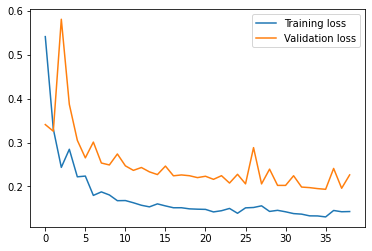

In [73]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend();

In [74]:
model.evaluate(X_test,y_test)

1/1 [==============================] - 0s 28ms/step - loss: 0.1493


0.14927156269550323